In [56]:
# 导包
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# 读取数据
# 根据题意，先把header设置好
headers = ['age', 'workclass', 'fnlwgt',
           'education', 'education_num', 'marital_status',
           'occupation', 'relationship', 'race',
           'sex', 'capital_gain', 'capital_loss',
           'hours_per_week', 'native_country', 'income']

# 读取训练集进入内存
train_data = pd.read_csv("data/adult_train.csv",names=headers)

# 对于测试集，他的第一行是一个分隔，不读入
test_data = pd.read_csv("data/adult_test.csv",names=headers,skiprows=[0])

In [58]:
# 看看训练集有多少数据
train_data.shape

(32561, 15)

In [68]:
# 看看数据是怎么样的，平均值；最大最小值，标准差等等（只有连续性的）
train_data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,income
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238,0.751078
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984,0.432396
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


In [60]:
# 数据中有一些值是？，用python的NaN代替方便以后直接当作空值处理
train_data = train_data.replace('[?]', np.NaN, regex=True)
# 看看数据里有NaN的各类有多少
train_data.isnull().sum()


age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
dtype: int64

In [61]:
# 对于缺失属性的数据直接删除
train_data = train_data.dropna()
train_data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [62]:
# 现在开始对离散性特征进行处理
# 离散性特征，我们首先关注的是education和一个连续性的education_num，因为这两个看起来关系很密切
# 看看education的分类分布情况
train_data['education'].value_counts()

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [63]:
# 看看education_num的分布情况
train_data['education_num'].value_counts()

9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    1008
6      820
4      557
15     542
5      455
8      377
16     375
3      288
2      151
1       45
Name: education_num, dtype: int64

In [64]:
# 发现这两个属性分布完全一样，只用保留一个，选择保留连续型的education_num
train_data.drop(columns=['education'])

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [ ]:
# 看看离散型变量workclass的种类以及个数

train_data['workclass'].value_counts()

In [ ]:
# 发现有一些是比较接近重叠的，将这些重叠的归到同一类
# 大致可以把gov有关的一类，Private一类，Self-emp一类，没工作的一类
train_data['workclass'] = train_data['workclass'].replace([' Private', ' Self-emp-not-inc', ' Self-emp-inc', 
                                                           ' Federal-gov', ' Local-gov', ' State-gov', 
                                                           ' Without-pay', ' Never-worked'],
                                                          [' Private', ' Self-emp', ' Self-emp', 
                                                           ' Gov', ' Gov', ' Gov', 
                                                           ' Un-emp', ' Un-emp'])

In [ ]:
# 现在看看marital-status


In [65]:
# 对于剩下的离散量取值，基本都是用来分类的，除了income我们需要将其映射一下，都可以让python自己分类（one-hot）
# 先将>=50K的映射成0，<=50K的设置为1
income_map = {' <=50K':1,' >50K':0}
train_data['income'] = train_data['income'].map(income_map).astype(int)


In [66]:
# 进行one-hot encoding
train_data_copy = pd.get_dummies(train_data, columns=['workclass', 'marital_status', 'occupation',
                                                      'relationship', 'race', 'sex',
                                                      'native_country'])

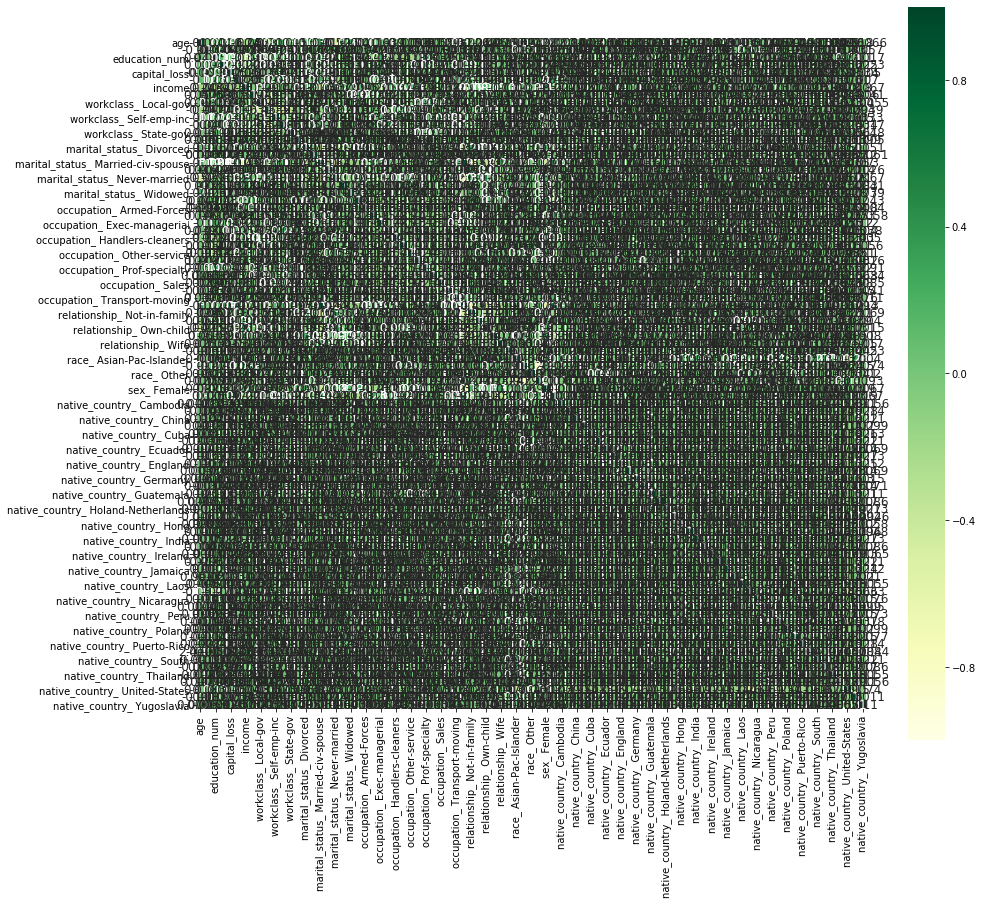

In [67]:
def correlation_heatmap(data, size=15):
    corr= data.corr()
    fig, ax =plt.subplots(figsize=(size,size))
    colormap=sns.diverging_palette(220, 10, as_cmap=True)
    fig=sns.heatmap(data.corr(), cmap = "YlGn", square=True, cbar_kws={'shrink':.9 }, ax=ax, annot=True, linewidths=0.1,vmax=1.0, linecolor='white',annot_kws={'fontsize':12 })

correlation_heatmap(train_data_copy)